## Cell Model Passport: images summary

This notebook contains summary information about microscope images taken for some lines of the Cell Model Passport, hereinafter referred to as CMP. All the information displayed here are retrieved from `images_info_table.csv`. Look at `get_table.ipynb` notebbok to see how to generate it.

### Libraries    

In [1]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

#to splay all columns
pd.options.display.max_columns = None

### Data path, parameter and fun

In [2]:
PATH_info = '../data/images_info_table.csv'
PATH_plot = '../plots/'

fig_dims = (12, 8)

In [3]:
def plot_ft_many(data, ft):
    fig_dims = (12, 8)

    fig, ax = plt.subplots(figsize=fig_dims)

    chart = sns.countplot(x=ft,
                          data=data,
                          palette="deep",
                          dodge=True,
                          order = data[ft].value_counts().index)

    labels = chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(f'Number of images per {ft}')

## CMP dataset  summary

In [4]:
data = pd.read_csv(PATH_info)

In [5]:
data.head()

,im_id,master_id,model_name,synonyms,model_type,growth_properties,doi,pmed,model_treatment,model_comments,msi_status,mutational_burden,ploidy,parent_id,mutation_data,methylation_data,expression_data,cnv_data,crispr_ko_data,fusion_data,drug_data,sample_id,tissue,tissue_status,cancer_type,cancer_type_detail,cancer_type_ncit_id,age_at_sampling,sampling_day,sampling_month,sampling_year,sample_treatment,sample_treatment_details,sample_site,tnm_t,tnm_n,tnm_m,tnm_integrated,tumour_grade,patient_id,species,gender,ethnicity,smoking_status,model_relations_comment,COSMIC_ID,BROAD_ID,CCLE_ID,RRID,HCMI,suppliers,SIDM
0,1877-8278,1877,SU-DHL-8,NaN,Cell Line,Suspension,NaN,NaN,NaN,NaN,MSS,11.700000,2.154088,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,SIDS01168,Haematopoietic and Lymphoid,Metastasis,B-Cell Non-Hodgkin's Lymphoma,Diffuse Large B-Cell Lymphoma,C8851,59.0,NaN,NaN,NaN,Unknown,NaN,Pleural effusion,NaN,NaN,NaN,NaN,NaN,SIDP01054,Homo Sapiens,Male,Unknown,Unknown,NaN,1331038,ACH-000656,SUDHL8_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CVCL_2207,NaN,DSMZ:ACC-573,SIDM00423
1,1476-8001,1476,SCC-4,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,MSS,6.666667,2.954601,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,SIDS00353,Head and Neck,Tumour,Oral Cavity Carcinoma,Tongue Squamous Cell Carcinoma,C4648,55.0,NaN,NaN,NaN,Unknown,NaN,Tongue,NaN,NaN,NaN,NaN,NaN,SIDP00298,Homo Sapiens,Male,Unknown,Unknown,NaN,910904,ACH-000238,SCC4_UPPER_AERODIGESTIVE_TRACT,CVCL_1684,NaN,ATCC:CRL-1624,SIDM01081
2,1068-8758,1068,PCI-4B,PCI-04B;PCI-4M,Cell Line,Unknown,NaN,NaN,NaN,NaN,MSS,7.233333,3.218832,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,SIDS00740,Head and Neck,Unknown,Head and Neck Carcinoma,Laryngeal Squamous Cell Carcinoma,C4044,NaN,NaN,NaN,NaN,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,SIDP00664,Homo Sapiens,Unknown,Unknown,Unknown,NaN,1298531,ACH-002297,PCI4B_UPPER_AERODIGESTIVE_TRACT,CVCL_C171,NaN,Unknown:Unknown,SIDM00043
3,2195-8403,2195,HuH-7,JTC-39,Cell Line,Unknown,NaN,NaN,NaN,NaN,MSS,11.533333,2.435328,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,SIDS00973,Liver,Tumour,Hepatocellular Carcinoma,Hepatocellular Carcinoma,C3099,57.0,NaN,NaN,NaN,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,SIDP00871,Homo Sapiens,Male,East Asian,Unknown,NaN,907071,ACH-000480,HUH7_LIVER,CVCL_0336,NaN,JCRB:JCRB0403,SIDM00585
4,162,162,DOK,NaN,Cell Line,Adherent,NaN,NaN,NaN,NaN,MSS,5.400000,3.510963,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,SIDS00902,Head and Neck,Tumour,Oral Cavity Carcinoma,Oral Dysplasia,C129863,57.0,NaN,NaN,NaN,Unknown,NaN,Tongue,NaN,NaN,NaN,NaN,NaN,SIDP00805,Homo Sapiens,Male,White,Unknown,NaN,910936,ACH-002234,DOK_UPPER_AERODIGESTIVE_TRACT,CVCL_1180,NaN,ECACC:94122104,SIDM00540


## General info

In [6]:
features = list(data.columns)
images = list(data.index)


print(f"THE DATSET DESCRBES {len(images)} IMAGES USING {len(features)} FEATURES:\n")
for f in features:
    print (f)

THE DATSET DESCRBES 736 IMAGES USING 52 FEATURES:

im_id
master_id
model_name
synonyms
model_type
growth_properties
doi
pmed
model_treatment
model_comments
msi_status
mutational_burden
ploidy
parent_id
mutation_data
methylation_data
expression_data
cnv_data
crispr_ko_data
fusion_data
drug_data
sample_id
tissue
tissue_status
cancer_type
cancer_type_detail
cancer_type_ncit_id
age_at_sampling
sampling_day
sampling_month
sampling_year
sample_treatment
sample_treatment_details
sample_site
tnm_t
tnm_n
tnm_m
tnm_integrated
tumour_grade
patient_id
species
gender
ethnicity
smoking_status
model_relations_comment
COSMIC_ID
BROAD_ID
CCLE_ID
RRID
HCMI
suppliers
SIDM


### Number of images per tissue

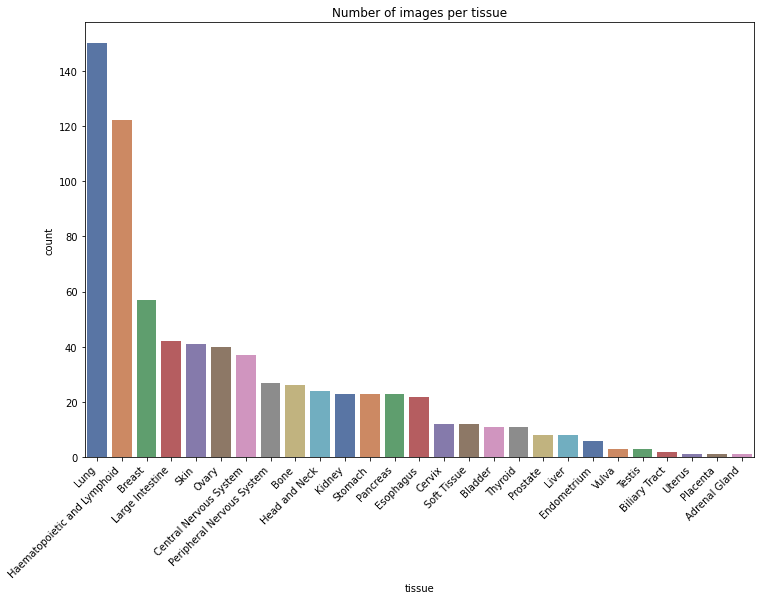

In [7]:
plot_ft_many(data, 'tissue')

### Number of images per cancer type

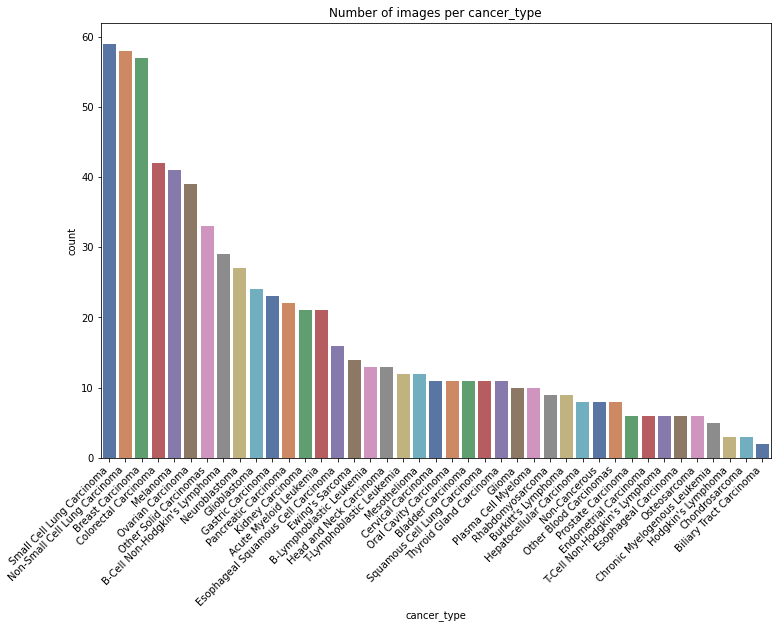

In [8]:
plot_ft_many(data, 'cancer_type')

### Number of images per model

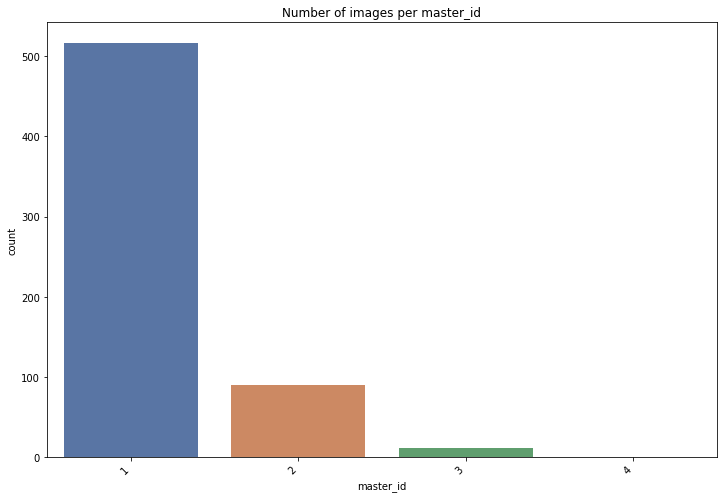

In [9]:
plot_ft_many(pd.DataFrame(data['master_id'].value_counts()), 'master_id')

**Here x axis is "Number of images available per cell model"**

### Omics available

In [10]:
omics_list = ['mutation_data','methylation_data','expression_data','cnv_data','crispr_ko_data']

omics_count = pd.DataFrame(columns=['count'],index=omics_list)

for o in omics_list:
    count= len(data[data[o]==1.0])
    omics_count['count'][o]=int(count)
    
omics_count

,count
mutation_data,734
methylation_data,718
expression_data,734
cnv_data,730
crispr_ko_data,227


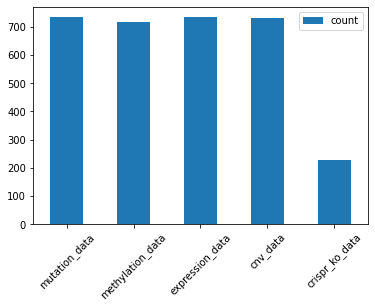

In [11]:
omics_count.plot.bar(rot=45)

### Distribution of tissue status

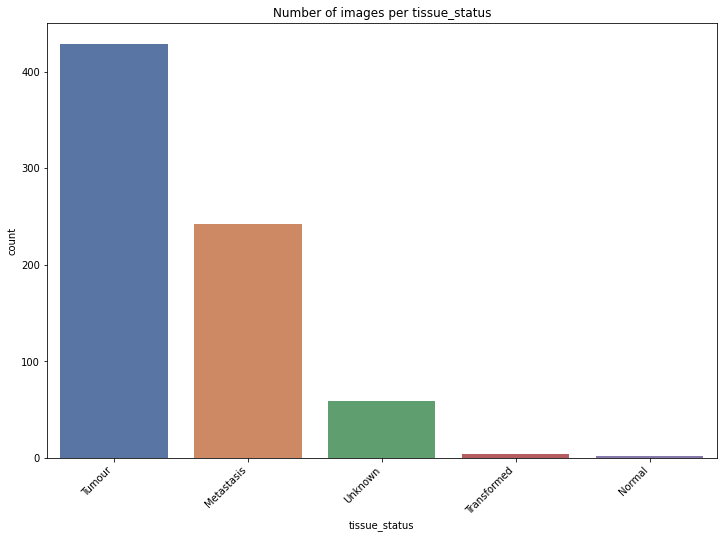

In [12]:
plot_ft_many(data, 'tissue_status')

## Consideration for classification

Interesting feature to classify on are (using images or set of feature as input):
- **tissue and cancer type** -> many class not equally distributed
- **drug tolerance** -> one model for each drug or only one model for tolerance profile [0,1,1,0,1] 
- **tissue status** -> binary classification, unbalanced class (not so much), unknown class could be used as test (if manually labeled)

More features to be extracted (after QC):
- cell size
- cell number
- cell shape